## NAIVE BAYES

In [1]:
# Improtting the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
#Importing the dataset
dataset = pd.read_csv('C:\\Users\\Parul\\Desktop\\DATASETS\\purchase_salary.csv')

In [3]:
dataset.shape

(400, 5)

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [8]:
dataset.describe

<bound method NDFrame.describe of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
5    15728773    Male   27            58000          0
6    15598044  Female   27            84000          0
7    15694829  Female   32           150000          1
8    15600575    Male   25            33000          0
9    15727311  Female   35            65000          0
10   15570769  Female   26            80000          0
11   15606274  Female   26            52000          0
12   15746139    Male   20            86000          0
13   15704987    Male   32            18000          0
14   15628972    Male   18            82000          0
15   15697686    Male   29            80000          0
16   15733883    Male   47     

In [10]:
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [11]:
pd.unique(dataset['Purchased'])

array([0, 1], dtype=int64)

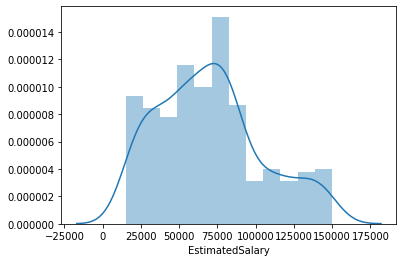

In [12]:
sb.distplot(dataset['EstimatedSalary'])

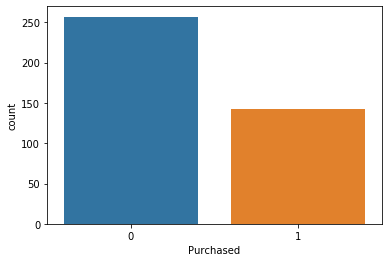

In [13]:
sb.countplot(x='Purchased',data=dataset)

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 101)

In [16]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
# Predicting the test set results
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [19]:
classifier.score(x_test,y_test)

0.85

In [20]:
x_new = sc.transform([[28, 30000]])
classifier.predict(x_new)

array([0], dtype=int64)

In [22]:
# Evaluating the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[22  5]
 [ 1 12]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88        27
           1       0.71      0.92      0.80        13

    accuracy                           0.85        40
   macro avg       0.83      0.87      0.84        40
weighted avg       0.88      0.85      0.85        40

